# Data Exploration

. Taking 1 data file: wendnesday.csv

. Calculate the total number of customers in each section

. Calculate the total number of customers in each section over time

. Display the number of customers at checkout over time

. Calculate the time each customer spent in the market

. Calculate the total number of customers in the supermarket over time.

. Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”

In [163]:
import pandas as pd
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt

In [164]:
wed = pd.read_csv('D:/DS/Data/supermarket/wednesday.csv', sep= ';')
wed.head()

,timestamp,customer_no,location
0,2019-09-04 07:00:00,1,fruit
1,2019-09-04 07:00:00,2,dairy
2,2019-09-04 07:00:00,3,fruit
3,2019-09-04 07:00:00,4,fruit
4,2019-09-04 07:00:00,5,dairy


In [165]:
wed.shape

(5050, 3)

In [166]:
wed.info

<bound method DataFrame.info of                 timestamp  customer_no  location
0     2019-09-04 07:00:00            1     fruit
1     2019-09-04 07:00:00            2     dairy
2     2019-09-04 07:00:00            3     fruit
3     2019-09-04 07:00:00            4     fruit
4     2019-09-04 07:00:00            5     dairy
...                   ...          ...       ...
5045  2019-09-04 21:48:00         1528    spices
5046  2019-09-04 21:49:00         1520     dairy
5047  2019-09-04 21:49:00         1529     dairy
5048  2019-09-04 21:49:00         1530     fruit
5049  2019-09-04 21:49:00         1531  checkout

[5050 rows x 3 columns]>

In [167]:
wed['timestamp'] = pd.to_datetime(wed['timestamp'], format="%Y-%m-%d %H:%M:%S")
wed['time'] = wed['timestamp']
wed.head()

,timestamp,customer_no,location,time
0,2019-09-04 07:00:00,1,fruit,2019-09-04 07:00:00
1,2019-09-04 07:00:00,2,dairy,2019-09-04 07:00:00
2,2019-09-04 07:00:00,3,fruit,2019-09-04 07:00:00
3,2019-09-04 07:00:00,4,fruit,2019-09-04 07:00:00
4,2019-09-04 07:00:00,5,dairy,2019-09-04 07:00:00


## Calculate the total number of customers in each section

In [169]:
wed.set_index('timestamp', inplace= True )

In [170]:
wed.groupby('location').count()

,customer_no,time
location,,
checkout,1526,1526
dairy,976,976
drinks,775,775
fruit,1043,1043
spices,730,730


<AxesSubplot:xlabel='location', ylabel='count'>

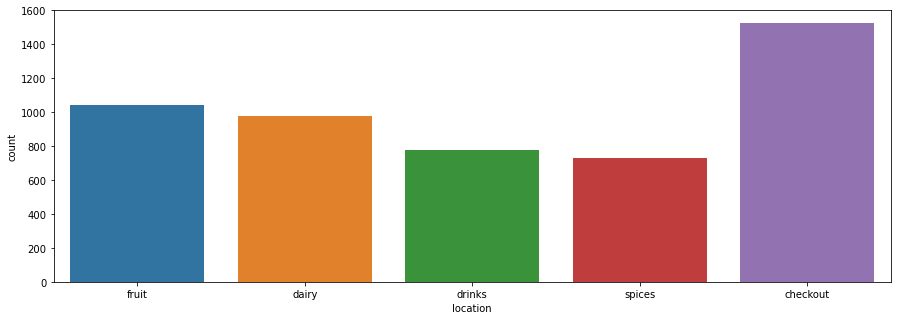

In [171]:
sns.countplot(data = wed
            ,x = 'location')

## Calculate the total number of customers in the supermarket over time.

In [172]:
customers_per_h = wed['location'].resample('H').count()
customers_per_h

timestamp
2019-09-04 07:00:00    279
2019-09-04 08:00:00    547
2019-09-04 09:00:00    373
2019-09-04 10:00:00    283
2019-09-04 11:00:00    287
2019-09-04 12:00:00    271
2019-09-04 13:00:00    358
2019-09-04 14:00:00    344
2019-09-04 15:00:00    246
2019-09-04 16:00:00    310
2019-09-04 17:00:00    305
2019-09-04 18:00:00    319
2019-09-04 19:00:00    674
2019-09-04 20:00:00    290
2019-09-04 21:00:00    164
Freq: H, Name: location, dtype: int64

## Calculate the total number of customers in each section over time

In [173]:
location_per_h = wed['location'].groupby(wed['location']).resample('H').count()
location_per_h.head()

location  timestamp          
checkout  2019-09-04 07:00:00     85
          2019-09-04 08:00:00    165
          2019-09-04 09:00:00    106
          2019-09-04 10:00:00     85
          2019-09-04 11:00:00     88
Name: location, dtype: int64

## Display the number of customers  in each section over time

<AxesSubplot:xlabel='timestamp'>

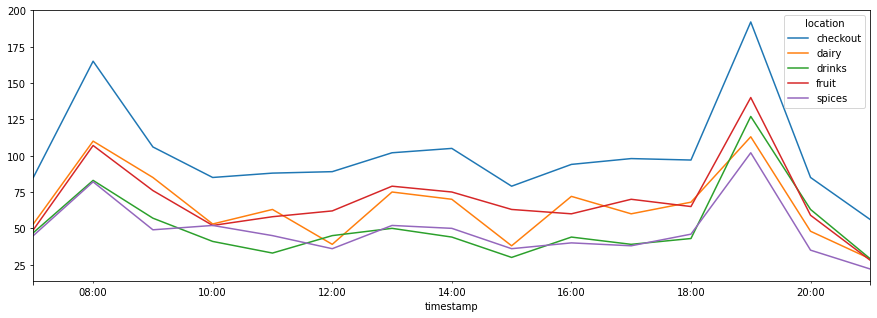

In [174]:
plt.rcParams['figure.figsize'] = [15, 5]
location_per_h.unstack(0).plot()

## Calculate the time each customer spent in the market

In [175]:
checkin =wed.groupby('customer_no')['time'].min()
checkout =wed.groupby('customer_no')['time'].max()
time_spent = pd.concat([checkin, checkout], axis=1)
time_spent['spenttime'] = checkout - checkin
time_spent['spenttime']

customer_no
1      0 days 00:02:00
2      0 days 00:06:00
3      0 days 00:11:00
4      0 days 00:03:00
5      0 days 00:01:00
             ...      
1527   0 days 00:03:00
1528   0 days 00:03:00
1529   0 days 00:04:00
1530   0 days 00:03:00
1531   0 days 00:03:00
Name: spenttime, Length: 1531, dtype: timedelta64[ns]

## Plot the distribution of customers of their first visited section versus following sections 

In [140]:
wed['first'] = wed.duplicated('customer_no')
wed.head()

,customer_no,location,first
timestamp,,,
2019-09-04 07:00:00,1,fruit,False
2019-09-04 07:00:00,2,dairy,False
2019-09-04 07:00:00,3,fruit,False
2019-09-04 07:00:00,4,fruit,False
2019-09-04 07:00:00,5,dairy,False


In [141]:
first = wed[wed['first'] == False]
follow = wed[wed['first'] == True]

In [142]:
first_group = first.groupby('location').count()
following_group = follow.groupby('location').count()

C:\Users\olive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\olive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Following Sections')

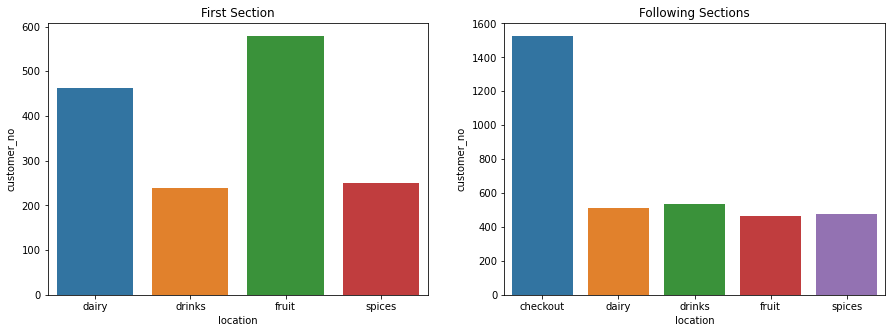

In [143]:
# no one went straight to checkout
fig, ax =plt.subplots(1,2, figsize=(15,5))
sns.barplot(first_group.index, first_group['customer_no'], ax=ax[0]).set_title('First Section')
sns.barplot(following_group.index, following_group['customer_no'], ax=ax[1]).set_title('Following Sections')

# Transition Probabilities for one customer

In [144]:
wed['after'] = wed.groupby(['customer_no'])['location'].shift(-1)
wed.head()

,customer_no,location,first,after
timestamp,,,,
2019-09-04 07:00:00,1,fruit,False,checkout
2019-09-04 07:00:00,2,dairy,False,spices
2019-09-04 07:00:00,3,fruit,False,spices
2019-09-04 07:00:00,4,fruit,False,checkout
2019-09-04 07:00:00,5,dairy,False,checkout


In [145]:
kulissara = wed.loc[wed['customer_no']==20]
kulissara

,customer_no,location,first,after
timestamp,,,,
2019-09-04 07:10:00,20,spices,False,fruit
2019-09-04 07:12:00,20,fruit,True,dairy
2019-09-04 07:16:00,20,dairy,True,spices
2019-09-04 07:17:00,20,spices,True,drinks
2019-09-04 07:19:00,20,drinks,True,spices
2019-09-04 07:20:00,20,spices,True,dairy
2019-09-04 07:21:00,20,dairy,True,checkout
2019-09-04 07:31:00,20,checkout,True,NaN


In [146]:
transprob_matrix = pd.crosstab(kulissara['after'], kulissara['location'], normalize=0)
transprob_matrix

location,dairy,drinks,fruit,spices
after,,,,
checkout,1.0,0.0,0.0,0.0
dairy,0.0,0.0,0.5,0.5
drinks,0.0,0.0,0.0,1.0
fruit,0.0,0.0,0.0,1.0
spices,0.5,0.5,0.0,0.0


# Monte-Carlo-Markov-Chain for one customer

In [147]:
from random import choices

In [159]:
STATES = ['checkout', 'dairy', 'drinks', 'fruit', 'spices']

In [160]:
P = {'checkin': [0.0, 0.25, 0.25, 0.25, 0.25],
    'dairy': transprob_matrix['dairy'].values, 
     'drinks' : transprob_matrix['drinks'].values,
     'fruit': transprob_matrix['fruit'].values,
     'spices': transprob_matrix['spices'].values}
P

{'checkin': [0.0, 0.25, 0.25, 0.25, 0.25],
 'dairy': array([1. , 0. , 0. , 0. , 0.5]),
 'drinks': array([0. , 0. , 0. , 0. , 0.5]),
 'fruit': array([0. , 0.5, 0. , 0. , 0. ]),
 'spices': array([0. , 0.5, 1. , 1. , 0. ])}

In [161]:
def mcmc(initial_state, P):
    """
    runs a Monte Carlo Markov Chain until checkout
    
    :params:
    :initial_state: this is a string with the state name that you start with
    :P: a dict of lists with the transition probability matrix
    """
    history = [initial_state]
    state = initial_state
    while state != 'checkout':
        probs = P[state]
        state = choices(STATES, probs) [0]
        history.append(state)
        if history[-1] == 'checkout':
            return history

print(f"Kulissara checkout after shopping {len(mcmc('checkin', P))} sections in supermarket")

Kulissara checkout after shopping 9 sections in supermarket
